<!-- <video controls src="./Desktop/tokyovideogio.mp4" width="1000" height="840" /> -->

# DATA UNDERSTANDING
by  Bayu Andrianto Wirawan & Shafwan Hanif


referensi bacaan
- https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

# DATA DICTIONARY

* 	BATHRM	: 	"Number of Full Bathrooms
"
* 	HF_BATHRM	: 	Number of Half Bathrooms (no bathtub or shower)
* 	HEAT	: 	Heating
* 	AC	: 	Cooling
* 	NUM_UNITS	: 	Number of Units
* 	ROOMS	: 	Number of Rooms
* 	BEDRM	: 	Number of Bedrooms
* 	AYB	: 	The earliest time the main portion of the building was built
* 	YR_RMDL	: 	Year structure was remodeled
* 	EYB	: 	The year an improvement was built more recent than actual year built
* 	STORIES	: 	Number of stories in primary dwelling
* 	SALEDATE	: 	Date of most recent sale
* 	PRICE	: 	Price of most recent sale
* 	QUALIFIED	: 	Qualified
* 	SALE_NUM	: 	Sale Number
* 	GBA	: 	Gross building area in square feet
* 	BLDG_NUM	: 	Building Number on Property
* 	STYLE	: 	Style
* 	STRUCT	: 	Structure
* 	GRADE	: 	Grade
* 	CNDTN	: 	Condition
* 	EXTWALL	: 	Extrerior wall
* 	ROOF	: 	Roof type
* 	INTWALL	: 	Interior wall
* 	KITCHENS	: 	Number of kitchens
* 	FIREPLACES	: 	Number of fireplaces
* 	USECODE	: 	Property use code
* 	LANDAREA	: 	Land area of property in square feet
* 	GIS_LAST_MOD_DTTM	: 	Last Modified Date
* 	SOURCE	: 	Raw Data Source
* 	CMPLX_NUM	: 	Complex number
* 	LIVING_GBA	: 	Gross building area in square feet
* 	FULLADDRESS	: 	Full Street Address
* 	CITY	: 	City
* 	STATE	: 	State
* 	ZIPCODE	: 	Zip Code
* 	NATIONALGRID	: 	Address location national grid coordinate spatial address
* 	LATITUDE	: 	Latitude
* 	LONGITUDE	: 	Longitude
* 	ASSESSMENT_NBHD	: 	Neighborhood ID
* 	ASSESSMENT_SUBNBHD	: 	Subneighborhood ID
* 	CENSUS_TRACT	: 	Census tract
* 	CENSUS_BLOCK	: 	Census block
* 	WARD	: 	"Ward (District is divided into eight wards, each with approximately 75,000 residents)
"
* 	SQUARE	: 	Square (from SSL - (Square, Suffix, Lot))
* 	X	: 	Latitude
* 	Y	: 	Longitude
* 	QUADRANT	: 	City quadrant (NE,SE,SW,NW)

# Import Package

In [16]:
import pandas as pd
import numpy as np
import statistics as st
from collections import Counter

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [17]:
print('pandas version:', pd.__version__,'per January 2022')
print('matplotlib version:', matplotlib.__version__,'per January 2022')
print('seaborn version:', sns.__version__,'per January 2022')

pandas version: 1.3.4 per January 2022
matplotlib version: 3.5.0 per January 2022
seaborn version: 0.11.2 per January 2022


# Read Data

In [3]:
df = pd.read_csv('Data/DC_Properties.csv', index_col= 'Unnamed: 0')

In [4]:
df.head() #menampilkan lima data teratas

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
df.tail() # menampilkan 5 data terbawah

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,NaN,2015-04-03 00:00:00,399900.0,Q,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,394,2018-07-22 18:01:38,Condominium,2786.0,639.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,NaN,2013-10-04 00:00:00,416000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,506,2018-07-22 18:01:38,Condominium,2786.0,820.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,NaN,2008-09-30 00:00:00,600000.0,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,467,2018-07-22 18:01:38,Condominium,2880.0,1167.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,NaN,2015-04-14 00:00:00,215100.0,Q,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,332,2018-07-22 18:01:38,Condominium,2275.0,447.0,NaN,NaN,NaN,20024.0,NaN,38.872953,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW
158956,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,NaN,2002-07-22 00:00:00,NaN,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,332,2018-07-22 18:01:38,Condominium,2275.0,447.0,NaN,NaN,NaN,20024.0,NaN,38.872953,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [6]:
print("Jumlah kolom :", df.shape[1]) # indexing 1
print("Jumlah baris :", df.shape[0]) # indexing 0

Jumlah kolom : 48
Jumlah baris : 158957


In [7]:
df.columns # mengeluarkan kolom-kolom di dataset

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

# DESCRIBE DATA

In [8]:
df_describe =[]

for i in df.columns: #mengiterasi i di setiap kolom pada df
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df[i].dtypes,#tipe
        df[i].isna().sum(),#jumlah NaN
        round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN
        df[i].nunique(),#Jumlah Unique
        df[i].unique() #Unique
        
    ])

In [9]:
DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data airbnb_describe dengan kolom-kolom tersebut

In [10]:
DESC

,column,type,nan,nan%,nunique,unique
0,BATHRM,int64,0,0.00,15,"[4, 3, 2, 1, 5, 6, 7, 8, 11, 9, 0, 10, 12, 14,..."
1,HF_BATHRM,int64,0,0.00,10,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 11]"
2,HEAT,object,0,0.00,14,"[Warm Cool, Hot Water Rad, Forced Air, Elec Ba..."
3,AC,object,0,0.00,3,"[Y, N, 0]"
4,NUM_UNITS,float64,52261,32.88,7,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0, 6.0, nan]"
5,ROOMS,int64,0,0.00,40,"[8, 11, 9, 10, 5, 7, 6, 12, 16, 14, 13, 4, 15,..."
6,BEDRM,int64,0,0.00,20,"[4, 5, 3, 2, 6, 7, 1, 8, 9, 10, 11, 0, 20, 12,..."
7,AYB,float64,271,0.17,220,"[1910.0, 1898.0, 1900.0, 1913.0, 1917.0, 1906...."
8,YR_RMDL,float64,78029,49.09,110,"[1988.0, 2007.0, 2009.0, 2003.0, 2012.0, nan, ..."
9,EYB,int64,0,0.00,135,"[1972, 1984, 1985, 1957, 1967, 1950, 1954, 196..."


- Berdasarkan data persentase NaN diatas,terdapat persentase NaN yang cukup mengejutkan. Terdapat NaN di presentase yang sama yaitu di 33.28% dan 33.88% di beberapa kolom. serta di beberapa kolom memiliki NaN sebanyak 67.12% di kolom [CMPLX_NUM] & [LIVING_GBA]. Lalu berdasarkan tabel tersebut, data akan di handle dengan mengelompokkan kolom berdasarkan jumlah persentase NaN nya sehingga akan lebih mudah untuk memikirkan langkah yang akan diambil (Fillna/Dropna).
- Berdasarkan data yang ada ditemukan beberapa kolom yang memiliki data yang dapat di kategorikan sebagai data ''category''. sehingga kedepanya akan di ubah untuk tipe data menjadi data tipe categorycal

## Describe

In [11]:
df.describe().T #describe yang di transpose kan untuk mengeluarkan summary basic statistcal details pada data

,count,mean,std,min,25%,50%,75%,max
BATHRM,158957.0,1.810678,9.763960e-01,0.000000,1.000000,2.000000,2.000000,1.400000e+01
HF_BATHRM,158957.0,0.458237,5.875715e-01,0.000000,0.000000,0.000000,1.000000,1.100000e+01
NUM_UNITS,106696.0,1.198039,5.969244e-01,0.000000,1.000000,1.000000,1.000000,6.000000e+00
ROOMS,158957.0,6.187736,2.618165e+00,0.000000,4.000000,6.000000,7.000000,4.800000e+01
BEDRM,158957.0,2.732506,1.358864e+00,0.000000,2.000000,3.000000,3.000000,2.400000e+01
AYB,158686.0,1941.987579,3.364023e+01,1754.000000,1918.000000,1937.000000,1960.000000,2.019000e+03
YR_RMDL,80928.0,1998.243537,1.657579e+01,20.000000,1985.000000,2004.000000,2010.000000,2.019000e+03
EYB,158957.0,1963.718024,2.492315e+01,1800.000000,1954.000000,1963.000000,1975.000000,2.018000e+03
STORIES,106652.0,2.091793,2.933323e+00,0.000000,2.000000,2.000000,2.000000,8.260000e+02
PRICE,98216.0,931351.594934,7.061325e+06,1.000000,240000.000000,399999.000000,652000.000000,1.374275e+08


- Berdasarkan data diatas, semakin jelas ada terlihat untuk data yang memiliki NaN besar. yang mana akan berimpact terhadap count, mean, dan seterusnya.
- Berdasarkan data diatas terlihat jelas data ['PRICE'] memiliki outlier yang tinggi, dalam preposesing data ini harus segera di lakukan EDA. karena agar tidak mempengaruhi hasil dalam permodelan. 
- Berdasrkan data diatas, ada kecurigaan data-data outliers terlihat dari range antara nilai min/max nya, sehingga akan ditelaah lebih lanjut nantinya. Terlebih lagi apabila data tersebut memiliki NaN

In [12]:
df.groupby(['GRADE','CNDTN'])['CNDTN'].count()

GRADE          CNDTN    
Above Average  Average      17894
               Excellent      514
               Fair           370
               Good         10960
               Poor            39
                            ...  
Very Good      Excellent      275
               Fair            68
               Good          4630
               Poor             2
               Very Good      890
Name: CNDTN, Length: 61, dtype: int64

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [14]:
df_num.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,1,2522.0,1,2.0,5,24,1680,NaN,NaN,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881
1,3,1,2.0,11,5,1898.0,2007.0,1972,3.0,NaN,1,2567.0,1,2.0,4,24,1680,NaN,NaN,20009.0,38.914683,-77.040764,4201.0,-77.040429,38.914881
2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,3,2522.0,1,2.0,4,24,1680,NaN,NaN,20009.0,38.914684,-77.040678,4201.0,-77.040429,38.914881
3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,1,2484.0,1,2.0,3,24,1680,NaN,NaN,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881
4,2,1,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,1,5255.0,1,1.0,0,13,2032,NaN,NaN,20009.0,38.914383,-77.039361,4201.0,-77.040429,38.914881


In [15]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis():
  result = pd.DataFrame()

  for col in df_num.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   BATHRM        158957 non-null  int64  
 1   HF_BATHRM     158957 non-null  int64  
 2   NUM_UNITS     106696 non-null  float64
 3   ROOMS         158957 non-null  int64  
 4   BEDRM         158957 non-null  int64  
 5   AYB           158686 non-null  float64
 6   YR_RMDL       80928 non-null   float64
 7   EYB           158957 non-null  int64  
 8   STORIES       106652 non-null  float64
 9   PRICE         98216 non-null   float64
 10  SALE_NUM      158957 non-null  int64  
 11  GBA           106696 non-null  float64
 12  BLDG_NUM      158957 non-null  int64  
 13  KITCHENS      106695 non-null  float64
 14  FIREPLACES    158957 non-null  int64  
 15  USECODE       158957 non-null  int64  
 16  LANDAREA      158957 non-null  int64  
 17  CMPLX_NUM     52261 non-null   float64
 18  LIVI

In [17]:
dataframe_analysis()

,Column,Mean,Mode,Median,Variance,Standard Deviation,Skew
0,BATHRM,1.810678,1.000000,2.000000,9.533491e-01,0.976396,1.514664
1,HF_BATHRM,0.458237,0.000000,0.000000,3.452402e-01,0.587571,1.074097
2,NUM_UNITS,NaN,1.000000,1.000000,NaN,NaN,3.467857
3,ROOMS,6.187736,6.000000,6.000000,6.854787e+00,2.618165,1.283359
4,BEDRM,2.732506,3.000000,3.000000,1.846512e+00,1.358864,0.730773
5,AYB,NaN,1900.000000,1949.000000,NaN,NaN,0.511253
6,YR_RMDL,NaN,2006.000000,NaN,NaN,NaN,-21.693244
7,EYB,1963.718024,1957.000000,1963.000000,6.211634e+02,24.923150,-0.122476
8,STORIES,NaN,2.000000,2.000000,NaN,NaN,228.685177
9,PRICE,NaN,350000.000000,600000.000000,NaN,NaN,18.316249


## Plot Distribution

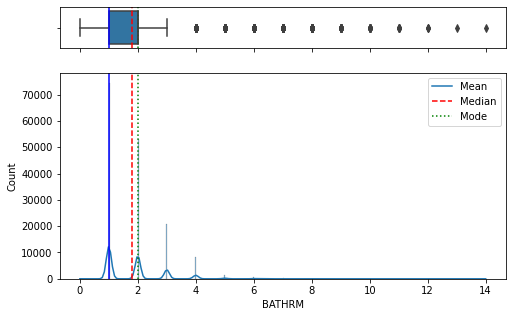

In [19]:
plot_distribution(df['BATHRM'])

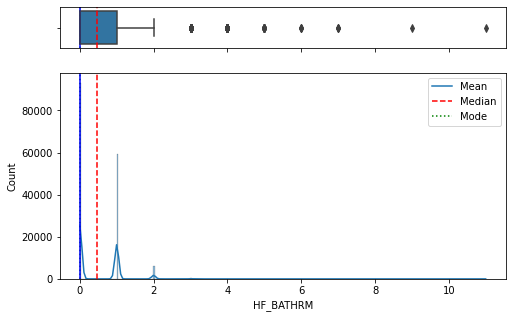

In [20]:
plot_distribution(df['HF_BATHRM'])

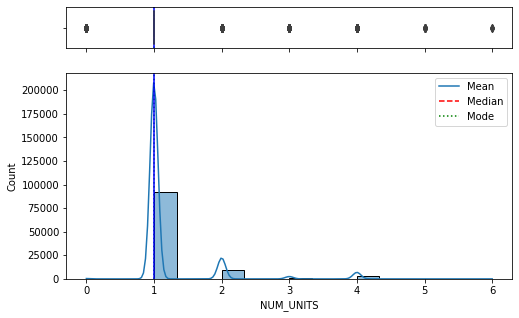

In [21]:
plot_distribution(df['NUM_UNITS'])

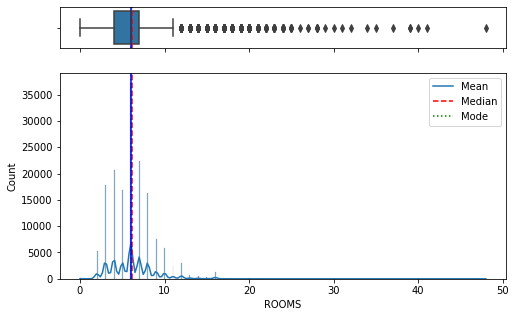

In [22]:
plot_distribution(df['ROOMS'])

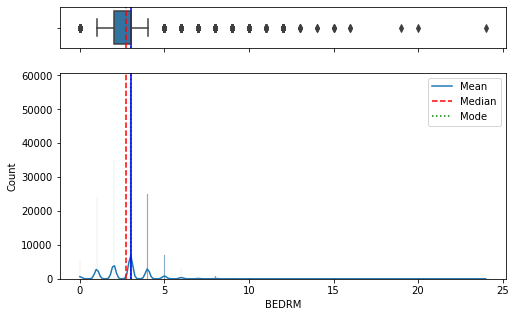

In [23]:
plot_distribution(df['BEDRM'])

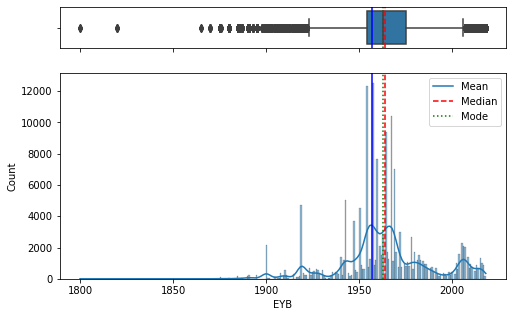

In [24]:
plot_distribution(df['EYB'])

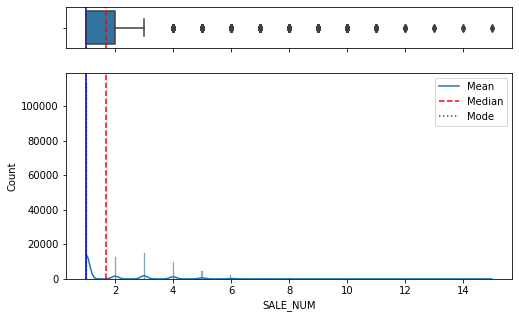

In [25]:
plot_distribution(df['SALE_NUM'])

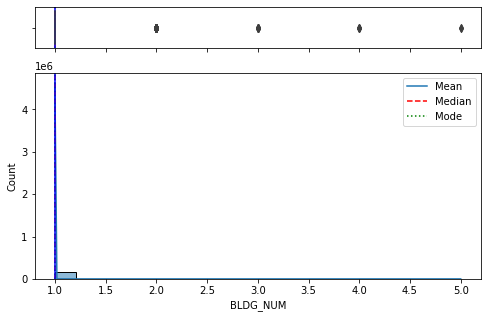

In [26]:
plot_distribution(df['BLDG_NUM'])

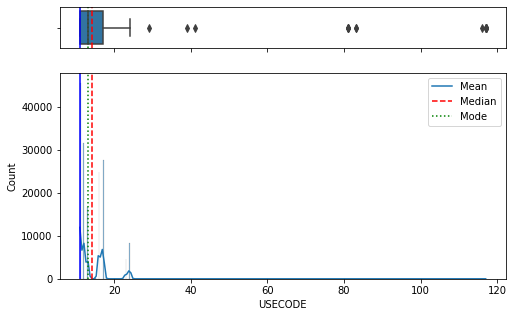

In [27]:
plot_distribution(df['USECODE'])

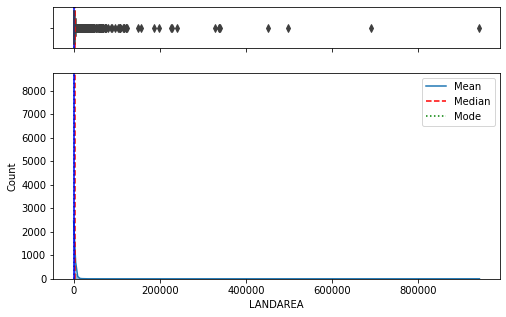

In [28]:
plot_distribution(df['LANDAREA'])

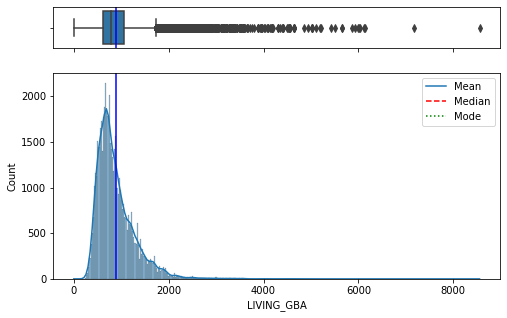

In [29]:
plot_distribution(df['LIVING_GBA'])

## Folium Visualization

In [1]:
fig, axarr = plt.subplots(6, 1, figsize=(18, 40))
fig.suptitle('Locations',fontsize=15)

sns.scatterplot(y=df['LATITUDE'],x=df['LONGITUDE'],hue=df['WARD'],palette='husl',ax=axarr[0]).set_title('Lattitude-Longitude, Ward')
sns.scatterplot(y=df['LATITUDE'],x=df['LONGITUDE'],hue=df['GRADE'],palette='Set1',ax=axarr[1]).set_title('Lattitude-Longitude, Grade')
sns.scatterplot(y=df['LATITUDE'],x=df['LONGITUDE'],hue=df['CNDTN'],palette='Set1',ax=axarr[2]).set_title('Lattitude-Longitude, CNDTN')
sns.scatterplot(y=df['LATITUDE'],x=df['LONGITUDE'],hue=df['QUADRANT'],palette='Set1',ax=axarr[3]).set_title('Lattitude-Longitude, Quadrant')
sns.scatterplot(y=df['LATITUDE'],x=df['LONGITUDE'],hue=df['SOURCE'],palette='Set1',ax=axarr[4]).set_title('Lattitude-Longitude, Source')


plt.show()

NameError: name 'plt' is not defined

### Price Describe

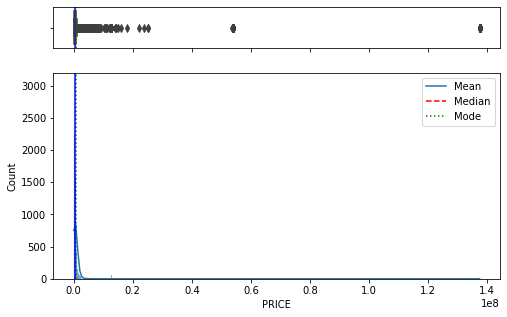

In [31]:
plot_distribution(df['PRICE'])

In [32]:
df[df['PRICE']>100000].sort_values(by=['PRICE']).head(100)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
102563,1,2,Forced Air,Y,1.0,6,3,1980.0,NaN,1995,2.0,2001-01-19 00:00:00,100007.0,Q,1,1134.0,1,2 Story,Row Inside,Average,Average,Brick Veneer,Comp Shingle,Hardwood,1.0,0,11,1170,2018-07-22 18:01:43,Residential,NaN,NaN,1018 BARNABY TERRACE SE,WASHINGTON,DC,20032.0,18S UJ 27299 00282,38.834413,-76.989717,Congress Heights,016 C Congress Heights,9700.0,009700 1012,Ward 8,5921,-76.987745,38.834409,SE
86641,1,1,Warm Cool,Y,1.0,5,3,1947.0,NaN,1957,2.0,2010-03-30 00:00:00,100009.0,U,1,1152.0,1,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,11,1800,2018-07-22 18:01:43,Residential,NaN,NaN,3981 CLAY PLACE NE,WASHINGTON,DC,20019.0,18S UJ 31101 06648,38.892483,-76.947498,Deanwood,018 A Deanwood,9603.0,009603 2003,Ward 7,5050,-76.949118,38.892131,NE
86387,2,1,Forced Air,Y,2.0,6,3,1967.0,NaN,1974,2.0,1998-01-15 00:00:00,100055.0,Q,1,1332.0,1,2 Story,Semi-Detached,Average,Average,Brick/Siding,Metal- Sms,Carpet,2.0,0,13,3113,2018-07-22 18:01:43,Residential,NaN,NaN,4524 CLAY STREET NE,WASHINGTON,DC,20019.0,18S UJ 32054 06790,38.893940,-76.936545,Deanwood,018 E Deanwood,7803.0,007803 3000,Ward 7,5134,-76.936229,38.893915,NE
10532,1,1,Hot Water Rad,N,2.0,5,3,1920.0,1978.0,1960,2.0,2000-01-31 00:00:00,100236.0,Q,1,1334.0,1,2 Story,Row End,Good Quality,Average,Common Brick,Metal- Sms,Wood Floor,2.0,1,11,916,2018-07-22 18:01:43,Residential,NaN,NaN,710 7TH STREET NE,WASHINGTON,DC,20002.0,18S UJ 26877 07495,38.899286,-76.996385,Old City 1,039 J Old City 1,8302.0,008302 1001,Ward 6,859,-76.997522,38.899145,NE
98343,2,0,Hot Water Rad,Y,1.0,5,2,1927.0,2005.0,1957,2.0,2004-07-28 00:00:00,100300.0,U,1,832.0,1,2 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Wood Floor,1.0,0,11,1120,2018-07-22 18:01:43,Residential,NaN,NaN,1457 RIDGE PLACE SE,WASHINGTON,DC,20020.0,18S UJ 27949 04076,38.868707,-76.983177,Anacostia,002 B Anacostia,7601.0,007601 5018,Ward 8,5604,-76.983694,38.868715,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,1,1,Warm Cool,Y,1.0,6,3,1950.0,2006.0,1969,2.0,1995-12-06 00:00:00,102000.0,Q,1,1888.0,1,2 Story,Semi-Detached,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,13,2674,2018-07-22 18:01:43,Residential,NaN,NaN,556 NICHOLSON STREET NE,WASHINGTON,DC,20011.0,18S UJ 26863 14253,38.960150,-76.998256,Riggs Park,NaN,9507.0,009507 1001,Ward 4,3736,-76.997092,38.959465,NE
142989,1,0,Forced Air,N,NaN,2,0,1928.0,2005.0,1928,NaN,2016-12-05 00:00:00,102000.0,U,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,162,2018-07-22 18:01:38,Condominium,1758.0,390.0,NaN,NaN,NaN,20010.0,NaN,38.931581,-77.034809,Columbia Heights,015 A Columbia Heights,2802.0,NaN,Ward 1,2676,-77.034811,38.931589,NW
101384,2,1,Warm Cool,Y,1.0,6,3,1985.0,NaN,1990,2.0,2000-05-09 00:00:00,102000.0,Q,1,1400.0,1,2 Story,Row Inside,Above Average,Average,Common Brick,Comp Shingle,Wood Floor,1.0,0,11,1991,2018-07-22 18:01:43,Residential,NaN,NaN,1813 VALLEY TERRACE SE,WASHINGTON,DC,20032.0,18S UJ 28382 00950,38.840640,-76.977403,Randle Heights,043 C Randle Heights,7304.0,007304 1013,Ward 8,5905,-76.977218,38.841060,SE
130516,1,0,Ht Pump,Y,NaN,5,2,1940.0,1975.0,1940,NaN,2004-09-07 00:00:00,102000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,1377,2018-07-22 18:01:38,Condominium,1272.0,1227.0,NaN,NaN,NaN,20020.0,NaN,38.863859,-76.952711,Hillcrest,028 C Hillcrest,7603.0,NaN,Ward 7,5670,-76.952713,38.863866,SE


# EDA Insight data Year

In [33]:
df_test = pd.to_datetime(df['SALEDATE'])
df_test = pd.DataFrame(df_test)

# df_test['year']=pd.datetime(index = df_test['SALEDATE'])
df_test['year'] = pd.DatetimeIndex(df_test['SALEDATE']).year

<AxesSubplot:xlabel='year', ylabel='Count'>

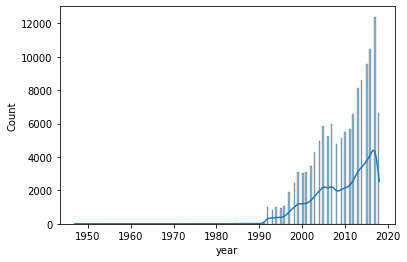

In [34]:

sns.histplot(x='year', data = df_test, kde=True)

In [35]:
x = df_test["year"]>=1990
x.sum()

131889

In [36]:
df_test.groupby(['year']).agg({'year': ['count']})

,year
,count
year,
1947.0,1
1949.0,1
1950.0,1
1955.0,2
1956.0,1
...,...
2014.0,8635
2015.0,9578


In [37]:
date_range = str(df_test['SALEDATE'].min()) + ' to ' +str(df_test['SALEDATE'].max())
print(date_range)

1947-05-14 00:00:00 to 2018-07-12 00:00:00


In [38]:
df['PriceRange'] = np.where(df['PRICE'] <= 100000, '0-100,000',  
                                       np.where ((df['PRICE'] > 100000) & (df['PRICE'] <= 1000000), '100,001 - 1M',
                                                np.where((df['PRICE'] > 1000000) & (df['PRICE'] <= 3000000), '1M - 3M',
                                                        np.where((df['PRICE']>3000000) & (df['PRICE']<=5000000), '3M - 5M',
                                                                np.where((df['PRICE']>5000000) & (df['PRICE']<=6000000), '5M - 6M',
                                                                        np.where((df['PRICE']>6000000) & (df['PRICE']<=7000000), '6M - 7M',
                                                                                np.where((df['PRICE']>7000000) & (df['PRICE']<=8000000), '7M-8M', 
                                                                                         np.where((df['PRICE']>8000000) & (df['PRICE']<=9000000), '8M-9M', 
                                                                                                 np.where((df['PRICE']>9000000) & (df['PRICE']<=10000000), '9M-10M', 
                                                                                                         np.where((df['PRICE']>10000000) & (df['PRICE']<=11000000), '10M-11M', 
                                                                                                                 np.where((df['PRICE']>11000000) & (df['PRICE']<=12000000), '11M-12M', '')
                                                                                                                 ))))))))))

In [39]:
df.groupby(['PriceRange']).agg({'PriceRange': ['count']})

,PriceRange
,count
PriceRange,
,61176
"0-100,000",5912
"100,001 - 1M",83411
10M-11M,5
11M-12M,2
1M - 3M,7897
3M - 5M,421
5M - 6M,78


In [40]:
df_Price = df[df['PRICE'] < 2050000.0]

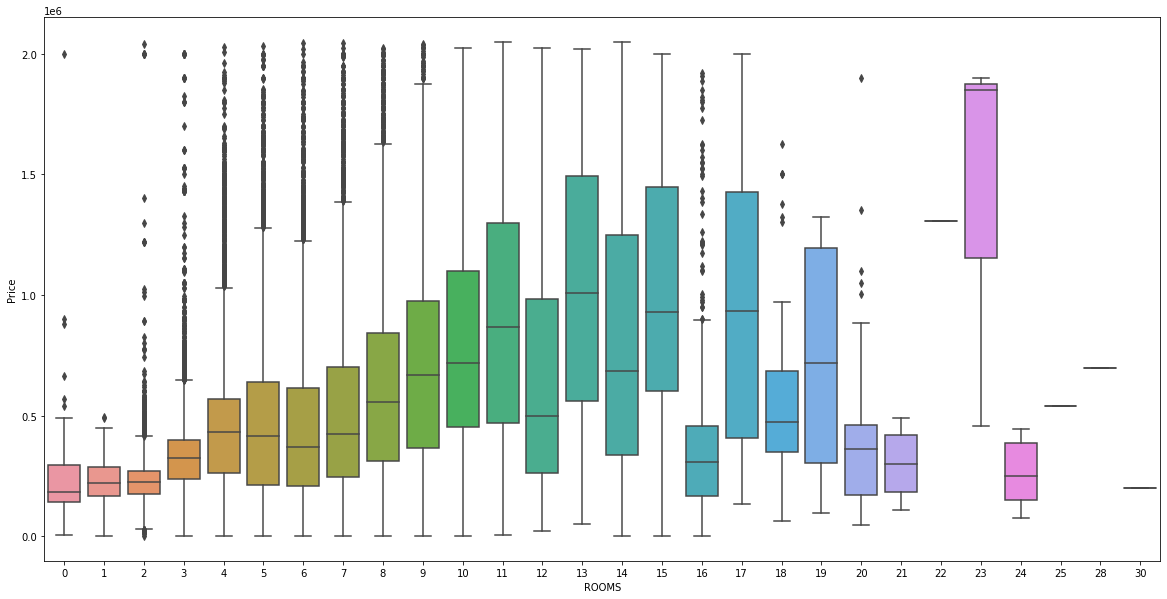

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'ROOMS', y = "PRICE", data=df_Price);
plt.ylabel("Price");

# FIXING TYPE OF EACH COLUMN

In [42]:
df.head(1)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PriceRange
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.91468,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1M - 3M


# MISSING VALUES

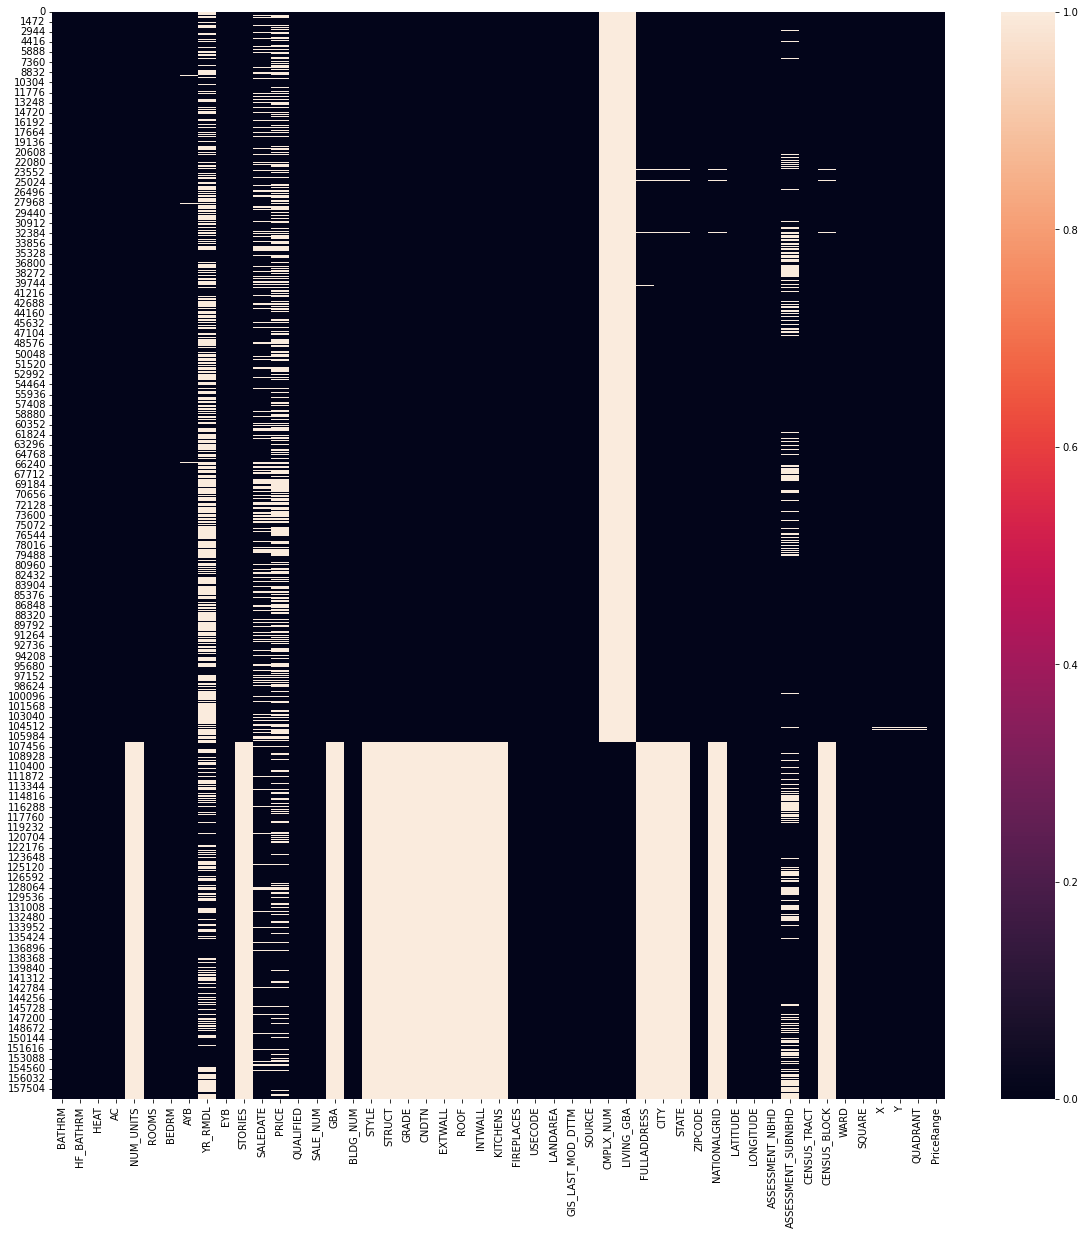

In [43]:
plt.figure(figsize=(20,20))# untuk size
sns.heatmap(df.isna()) # untuk plot heatmap NaN
plt.savefig('handling missing.png') # untuk mensave hasil plot

- Berdasarkan data NaN diatas, kolom-kolom tersebut akan dikelompokkan berdasarkan persentasenya untuk memudahkan proses menghandle nya

In [44]:
print("KOLOM LEBIH DARI 50% NAN\n\n",set(df.columns[df.isna().mean()> 0.5])) # kolom dengan lebih dari 50% nan
print("\nKOLOM LEBIH DARI 20% NAN\n\n",set(df.columns[(df.isna().mean()> 0.2)|(df.isna().mean()< 0.5)])) # kolom dengan lebih dari 20% nan
print("\nKOLOM LEBIH DARI 10% NAN\n\n",set(df.columns[(df.isna().mean()> 0.1)|(df.isna().mean()< 0.2)])) # kolom dengan lebih dari 10% nan
print("\nKOLOM KURANG DARI 10% NAN\n\n",set(df.columns[(df.isna().mean()<0.1)&(df.isna().mean()>0)]))


KOLOM LEBIH DARI 50% NAN

 {'LIVING_GBA', 'CMPLX_NUM'}

KOLOM LEBIH DARI 20% NAN

 {'NUM_UNITS', 'GIS_LAST_MOD_DTTM', 'FIREPLACES', 'STATE', 'INTWALL', 'LATITUDE', 'BLDG_NUM', 'AC', 'CNDTN', 'SALEDATE', 'AYB', 'PriceRange', 'CITY', 'FULLADDRESS', 'EXTWALL', 'ROOMS', 'YR_RMDL', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'SOURCE', 'SALE_NUM', 'X', 'ASSESSMENT_NBHD', 'WARD', 'CMPLX_NUM', 'LIVING_GBA', 'BEDRM', 'STRUCT', 'PRICE', 'QUADRANT', 'HEAT', 'KITCHENS', 'SQUARE', 'STYLE', 'LANDAREA', 'EYB', 'GRADE', 'STORIES', 'ROOF', 'USECODE', 'Y', 'LONGITUDE', 'ZIPCODE', 'GBA', 'NATIONALGRID', 'BATHRM', 'HF_BATHRM', 'QUALIFIED'}

KOLOM LEBIH DARI 10% NAN

 {'NUM_UNITS', 'GIS_LAST_MOD_DTTM', 'FIREPLACES', 'STATE', 'INTWALL', 'LATITUDE', 'BLDG_NUM', 'AC', 'CNDTN', 'SALEDATE', 'AYB', 'PriceRange', 'CITY', 'FULLADDRESS', 'EXTWALL', 'ROOMS', 'YR_RMDL', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'SOURCE', 'SALE_NUM', 'X', 'ASSESSMENT_NBHD', 'WARD', 'CMPLX_NUM', 'LIVING_GBA', 'BED

- Data Price untuk NaN akan segera di drop
- Berdasarkan data diatas, kita dapat melihat data-data NaN yang lebih terstruktur, untuk NaN diatas 50% yang berjumlah 8 akan langsung di drop.
- Untuk NaN yang lainnya, akan ditelaah satu-persatu berdasarkan unique dan deskripsinya. untuk menentukan relevansinya sehingga akan mempermudah memfillna ataupun di drop jika tidak relevan untuk digunakan

# RESIDENCE VS CONDOMINIUM

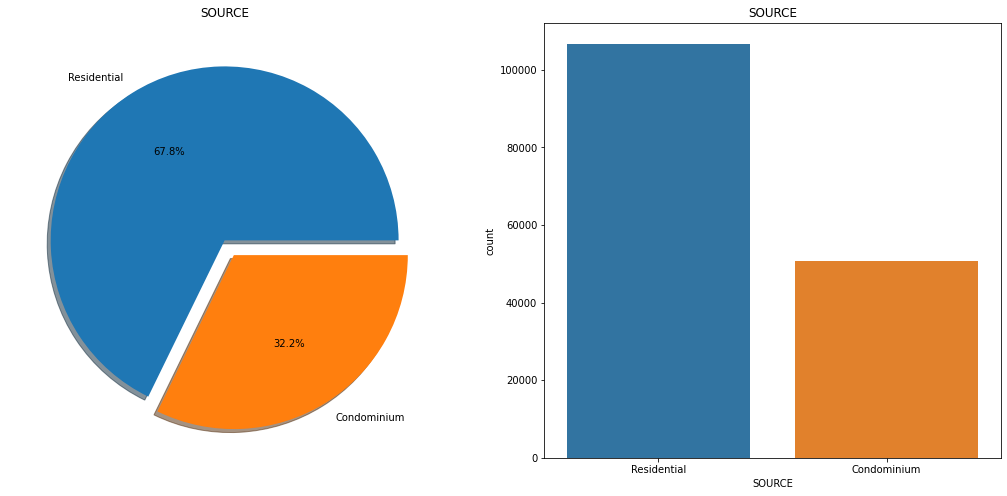

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['SOURCE'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SOURCE')
ax[0].set_ylabel('')
sns.countplot('SOURCE',data=df,ax=ax[1])
ax[1].set_title('SOURCE')
plt.show()

# DROP DUPLICATE DATA

In [6]:
print(df.duplicated().sum()) #menghitung duplicated value
df = df.drop_duplicates() # drop duplicated value

1508


### Hasil temuan dari EDA :

1. `RESIDENCE VS CONDOMINIUM` Harus di pisahkan untuk setiap `SOURCE`, agar mendapatkan hasil maksimal
2. Setaip NaN di `PRICE` akan di drop.
3. Untuk data yang kosong harus di isi dengan beberapa metode:
    - Drop Data
    - Mengisi NaN dengan Data Lain
    - Mengisi NaN dengan Median
    - Mengisi NaN dengan Modus
    - Dummy Variable
4. Normalized Price
    - melakukakan Normalisai Price - Kolom Price ditransform menggunakan Kubik